**Exploratory Data Analysis for Cognifyz Technologies** 

**Level 3**

**Task 1**

**Task 2**

**Task 3**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
df=pd.read_csv('Dataset .csv')
df.head()

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...          Currency Has Table booking  \
0        French, Japanese, Desserts  ...  Botswana Pula(P)               Yes   
1                          Japanese  ...  Botswana Pula(P)               Yes   
2  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)               Yes   
3                   Japanese, Sushi  ...  Botswana Pula(P)                No   
4                  Japanese, Korean  ...  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   
2                  No                No                   No           4   
3                  No                No                   No           4   
4                  No                No                   No           4   

   Aggregate rating  Rating color Rating text Votes  
0               4.8    Dark Green   Excellent   314  
1               4.5    Dark Green   Excellent   591  
2               4.4         Green   Very Good   270  
3               4.9    Dark Green   Excellent   365  
4               4.8    Dark Green   Excellent   229  

[5 rows x 21 columns]

**Task 1 Restaurant Reviews**

**3.1.1 Analysing the text reviews for identifying the most common positive and negative keyword**

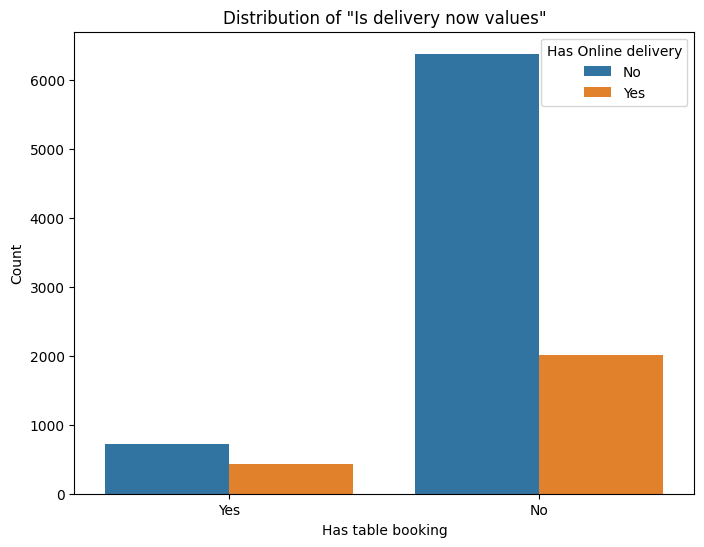

In [3]:
plt.figure(figsize=(8,6))
sns.countplot(x='Has Table booking', hue='Has Online delivery', data=df)
plt.title('Distribution of "Is delivery now values"')
plt.xlabel('Has table booking')
plt.ylabel('Count')
plt.show()

**Analysis** In the above distribution, it is showed that the binary values of 'Has Table Booking' is in contrast with the online delivery.

**3.1.2 Calculating the average length of reviews and explore if there is a relationship between review length and rating**

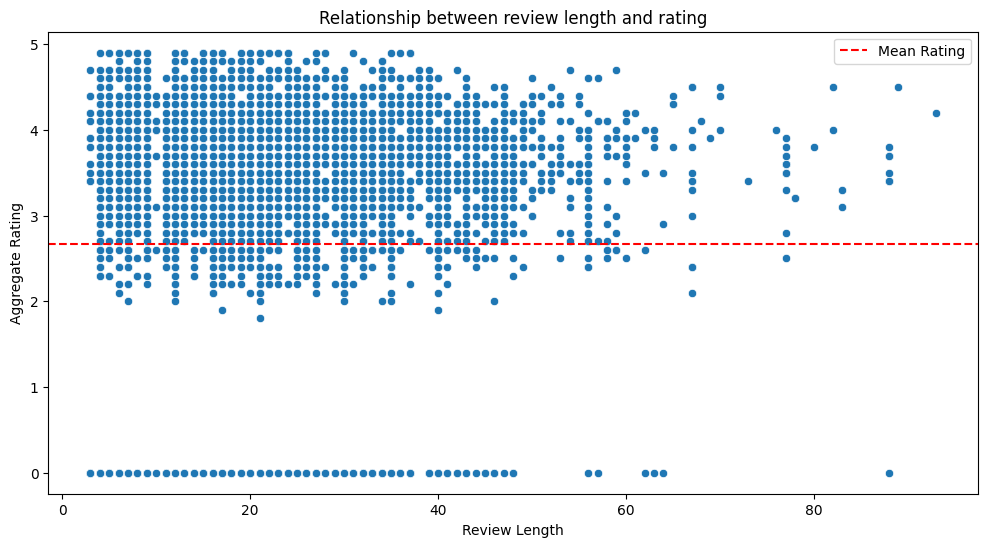

Average review length: 19.91 charecters


In [4]:
df['Review Length']=df['Cuisines'].astype(str).apply(len)
average_review_length=df['Review Length'].mean()
plt.figure(figsize=(12,6))
sns.scatterplot(x='Review Length',y='Aggregate rating',data=df)
plt.title('Relationship between review length and rating')
plt.xlabel('Review Length')
plt.ylabel('Aggregate Rating')
plt.axhline(y=df['Aggregate rating'].mean(),color='r',linestyle='--',label='Mean Rating')
plt.legend()
plt.show()

print(f'Average review length: {average_review_length:.2f} charecters')

**Analysis** The aboe plot is used to visualize the connection between aggregate rating and review length, as well as the red dotted line presents the mean rating.

**Task 2**

**Vote Analysis**

**3.2.1 Identification of retaurants alomg with the lowest and highest numbers of votes**

In [10]:
highest_votes_restaurants=df.loc[df['Votes'].idxmax(),'Restaurant Name']
lowest_votes_restaurants=df.loc[df['Votes'].idxmin(), 'Restaurant Name']

highest_vote_counts=df['Votes'].max()
lowest_vote_counts=df['Votes'].min()

print(f'Restaurants with highest votes: {highest_votes_restaurants} ({highest_vote_counts} votes)')
print(f'Restaurants with lowest votes: {lowest_votes_restaurants} ({lowest_vote_counts} votes)')

Restaurants with highest votes: Toit (10934 votes)
Restaurants with lowest votes: Cantinho da Gula (0 votes)


**3.2.2 Analysing if there is any correlation between the number of votes and the rating of a restaurants**

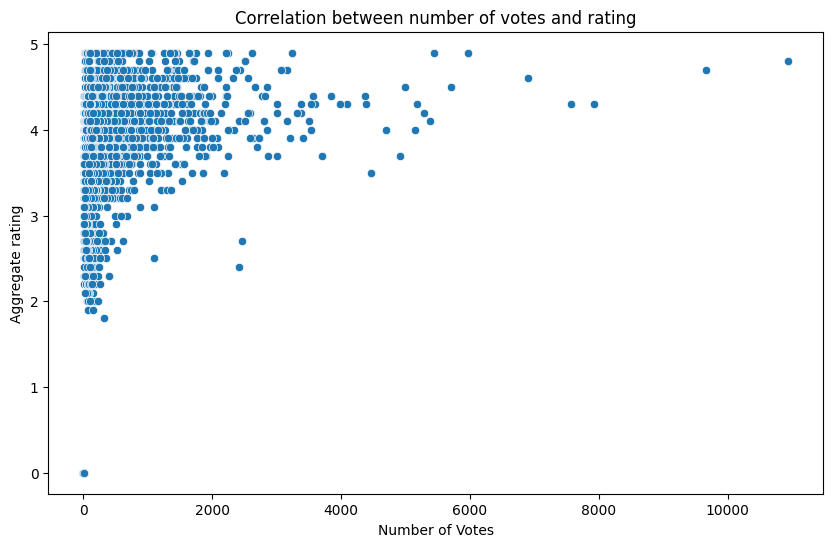

Correlation between votes and rating: 0.31


In [13]:
correlation_df=df[['Votes','Aggregate rating']]
correlation=correlation_df.corr().iloc[0,1]
plt.figure(figsize=(10,6))
sns.scatterplot(x='Votes',y='Aggregate rating',data=df)
plt.title('Correlation between number of votes and rating')
plt.xlabel('Number of Votes')
plt.ylabel('Aggregate rating')
plt.show()

print(f'Correlation between votes and rating: {correlation:.2f}')

**Analysis** In the upper code, the correlation co-efficient is calculated and printed by using the scatter plot. The positive correlation states that number of votes increased, the negative gives the opposite one.

**Task 3: Price range vs Table booking vs Online delivery**

**3.1 Analysing wheather there is a connection between the price range as well as the availability of table booking online delivery**

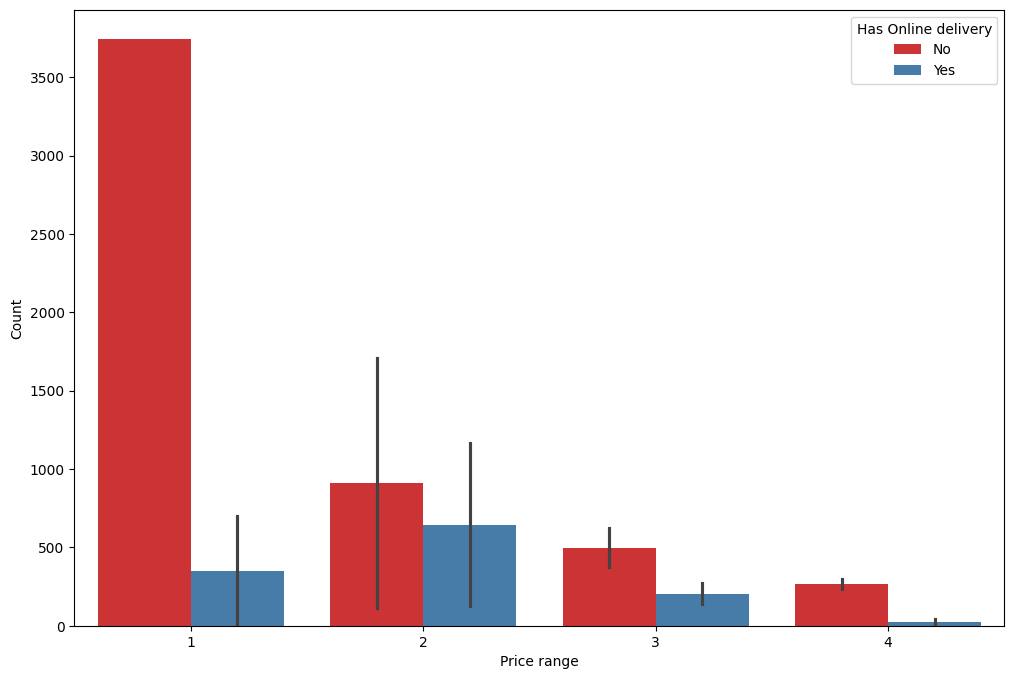

In [21]:
relationship_df=df[['Price range', 'Has Online delivery', 'Has Table booking']]
summary_table=relationship_df.groupby(['Price range','Has Online delivery','Has Table booking']).size().reset_index(name='Count')
plt.figure(figsize=(12,8))
sns.barplot(y='Count',x='Price range',hue='Has Online delivery',data=summary_table,palette='Set1')
plt.show()

**Analysis** Here is the above code summary table calculate the count the occurances of distinct combination of price range, Has Table Booking, Has Online Delivery. The grouped bar plot displays the relationship between these variables.

**3.2 Defining if there is any relationship between higher-priced restaurants and their offerable services**

             Has Online delivery  Has Table booking
Price range                                        
1                          100.0              100.0
2                          100.0              100.0
3                          100.0              100.0
4                          100.0              100.0


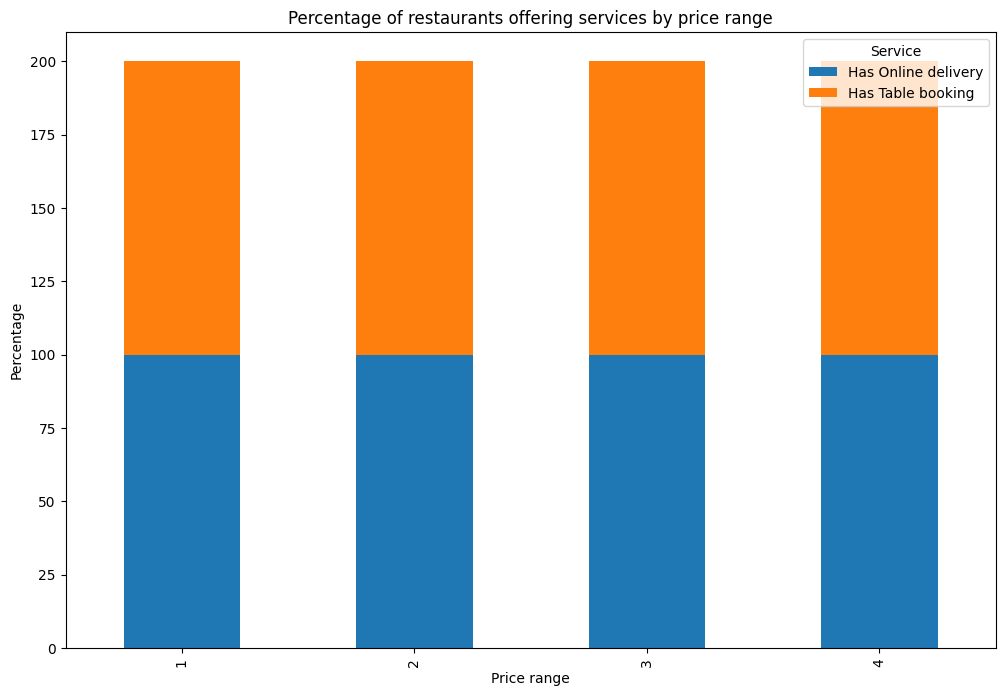

In [5]:
service_df=df[['Price range','Has Online delivery','Has Table booking']].copy()
service_df['Has Online delivery']=service_df['Has Online delivery'].astype(bool)
service_df['Has Table booking']=service_df['Has Table booking'].astype(bool)
service_df['Price range']=service_df['Price range'].astype(int)
percentage_df=service_df.groupby('Price range').mean()*100
print(percentage_df)
percentage_df.plot(kind='bar', stacked=True, figsize=(12,8))
plt.title('Percentage of restaurants offering services by price range')
plt.xlabel('Price range')
plt.ylabel('Percentage')
plt.legend(title='Service')
plt.show()

**Analysis:** After the observation of the plot, it is observed that there is a relationship between price range of restaurants and their offered table booking and online delivery services. Higher bars display high service offered by the restaurants in acertai ranges.

**Conclusion** The overall analysis of level 3 throws light on positive and negative sentiments of customers. Certain knowledge has been gained after justifying customer review and their experiences. Eventually the exploration reveals the pattern of review length as well as this analysis between review length and rating suggests potential correlation.

This analysis also indentifies lowest and highest number of votes. The analysis that is related to the correlation beween votes and restaurants ratings reveals customer preferences, how customer engagement can influence the ratings of restaurants.

The in-depth analysis of price range, online delivery, and table booking highlights that the high-priced-restaurants can offer best service, it illuminates potential relation between the service offerings and pricing of the restaurants. 